# Notebook for observing train and test files

## Imports and constants

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
TRAIN_FILENAME = 'train.csv'
TEST_FILENAME = 'test.csv'
SPREAD_ID = 6
FUNDING_RATE_ID = 1
COMMISION_VALUE = 0.08

## Train observation

In [5]:
train = pd.read_csv(TRAIN_FILENAME, dtype={'timestamp': np.int64}, index_col='timestamp')
train.head()

,number_of_trades_p,funding_rate,volume_p,number_of_trades_q,volume_q,time_left,spread,price_change_d_max,price_change_d_min,target
timestamp,,,,,,,,,,
1617482880,4473.0,0.000521,400.630,4.0,0.059,7125120.0,7.852325,-0.422779,-3.39489,9.51559
1617482940,2854.0,0.000521,249.644,2.0,0.066,7125060.0,7.880229,-0.422779,-3.39489,9.51559
1617483000,2555.0,0.000521,214.457,6.0,0.353,7125000.0,7.892018,-0.422779,-3.39489,9.51559
1617483060,1768.0,0.000521,148.087,12.0,0.330,7124940.0,7.902424,-0.422779,-3.39489,9.51559
1617483120,2280.0,0.000521,172.108,2.0,0.017,7124880.0,7.962683,-0.422779,-3.39489,9.51559


In [7]:
train.describe()

,number_of_trades_p,funding_rate,volume_p,number_of_trades_q,volume_q,time_left,spread,price_change_d_max,price_change_d_min,target
count,687484.000000,687484.000000,687484.000000,687484.000000,687484.000000,6.874840e+05,687484.000000,687484.000000,687484.000000,687484.000000
mean,2811.335144,0.000113,297.463007,31.343227,1.677754,4.083225e+06,1.283278,-0.446258,-5.567941,2.464253
std,3456.994971,0.000188,459.036871,51.314073,3.550947,2.329460e+06,1.707133,0.852666,3.440810,3.223569
min,0.000000,-0.000897,0.000000,0.000000,0.000000,0.000000e+00,-15.357827,-21.974419,-29.703188,0.255961
25%,1149.000000,0.000044,85.074000,9.000000,0.312000,2.062440e+06,0.279579,-0.604036,-6.569644,0.731849
50%,1819.000000,0.000100,163.499000,18.000000,0.694000,4.124880e+06,0.670729,-0.000236,-4.733347,1.494488
75%,3145.000000,0.000100,330.462000,35.000000,1.686000,6.121575e+06,1.465603,0.000000,-3.426779,2.768709
max,263775.000000,0.001486,24069.518000,7427.000000,300.054000,8.459940e+06,18.122196,0.000000,-1.120427,18.122196


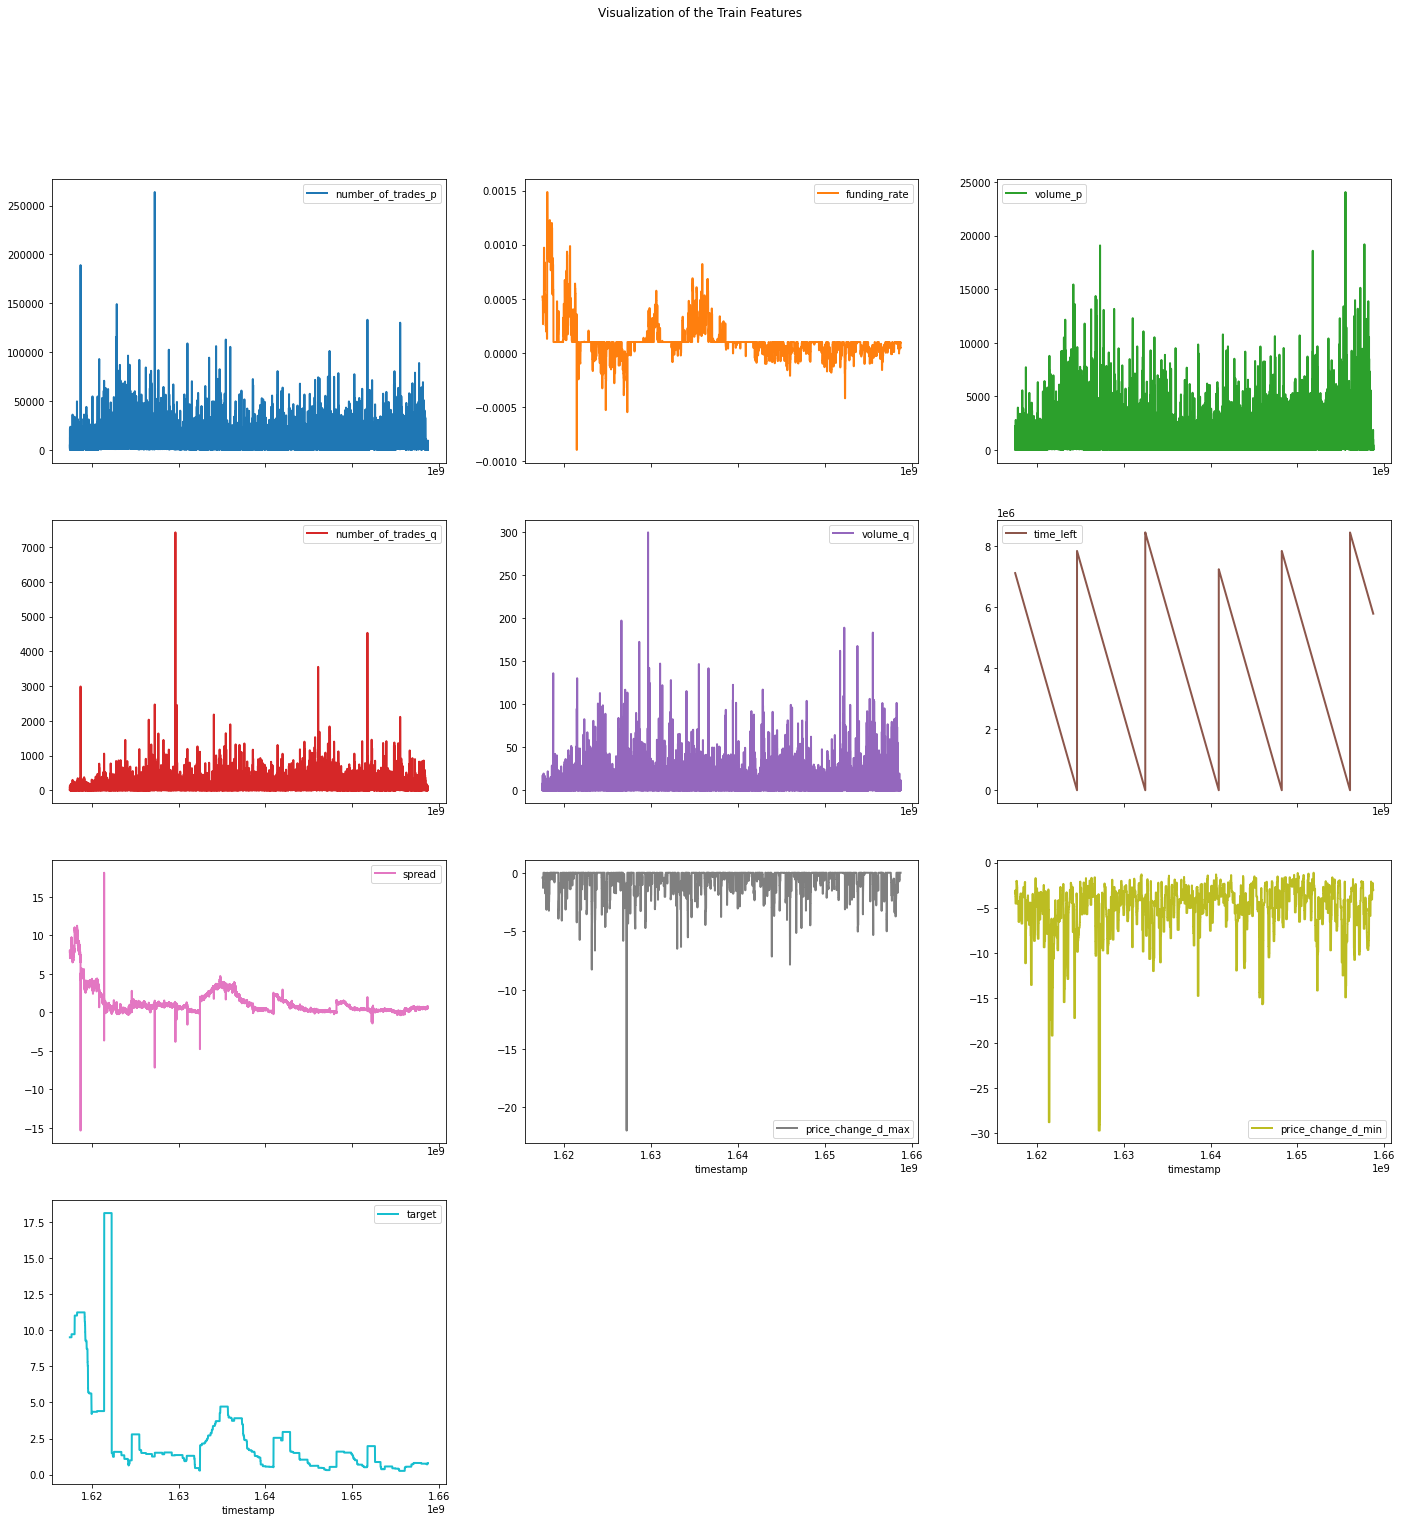

In [8]:
train.plot(subplots=True,
            layout=(4, 3),
            figsize=(24,24),
            fontsize=10, 
            linewidth=2, 
            title='Visualization of the Train Features')
plt.show()

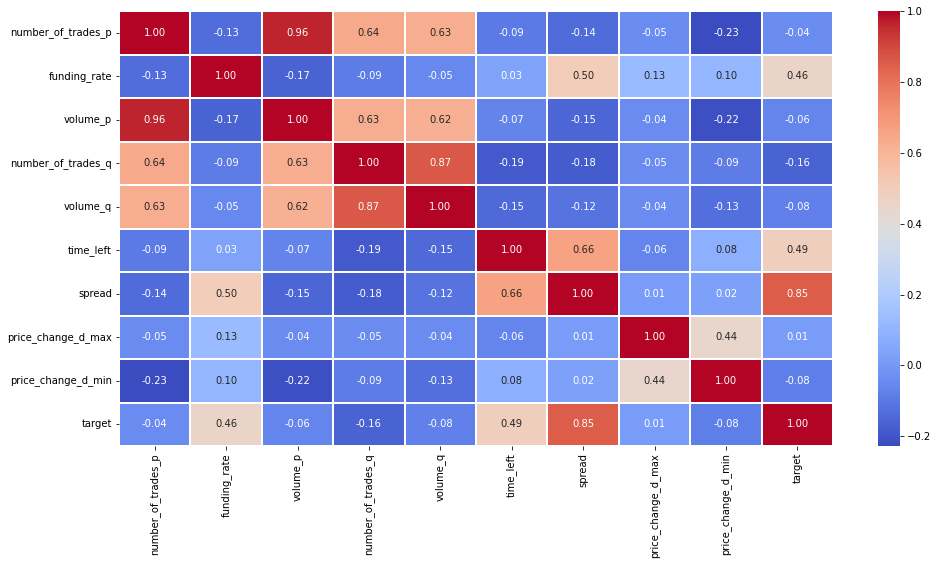

In [37]:
corr_matrix = train.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Plotting new target value (or something related to it)

In [22]:
plot_start = 10000
plot_end = len(train)
plot_position_type = 1

In [23]:
spreads = train.iloc[plot_start:plot_end, SPREAD_ID].to_numpy()
spread_0 = train.iloc[plot_start, SPREAD_ID]
rewards = plot_position_type * (spread_0 - spreads) - COMMISION_VALUE \
                    - plot_position_type * train.iloc[plot_start:plot_end, FUNDING_RATE_ID].cumsum()
rewards_swapped = -plot_position_type * (spread_0 - spreads) - COMMISION_VALUE \
                + plot_position_type * train.iloc[plot_start:plot_end, FUNDING_RATE_ID].cumsum()

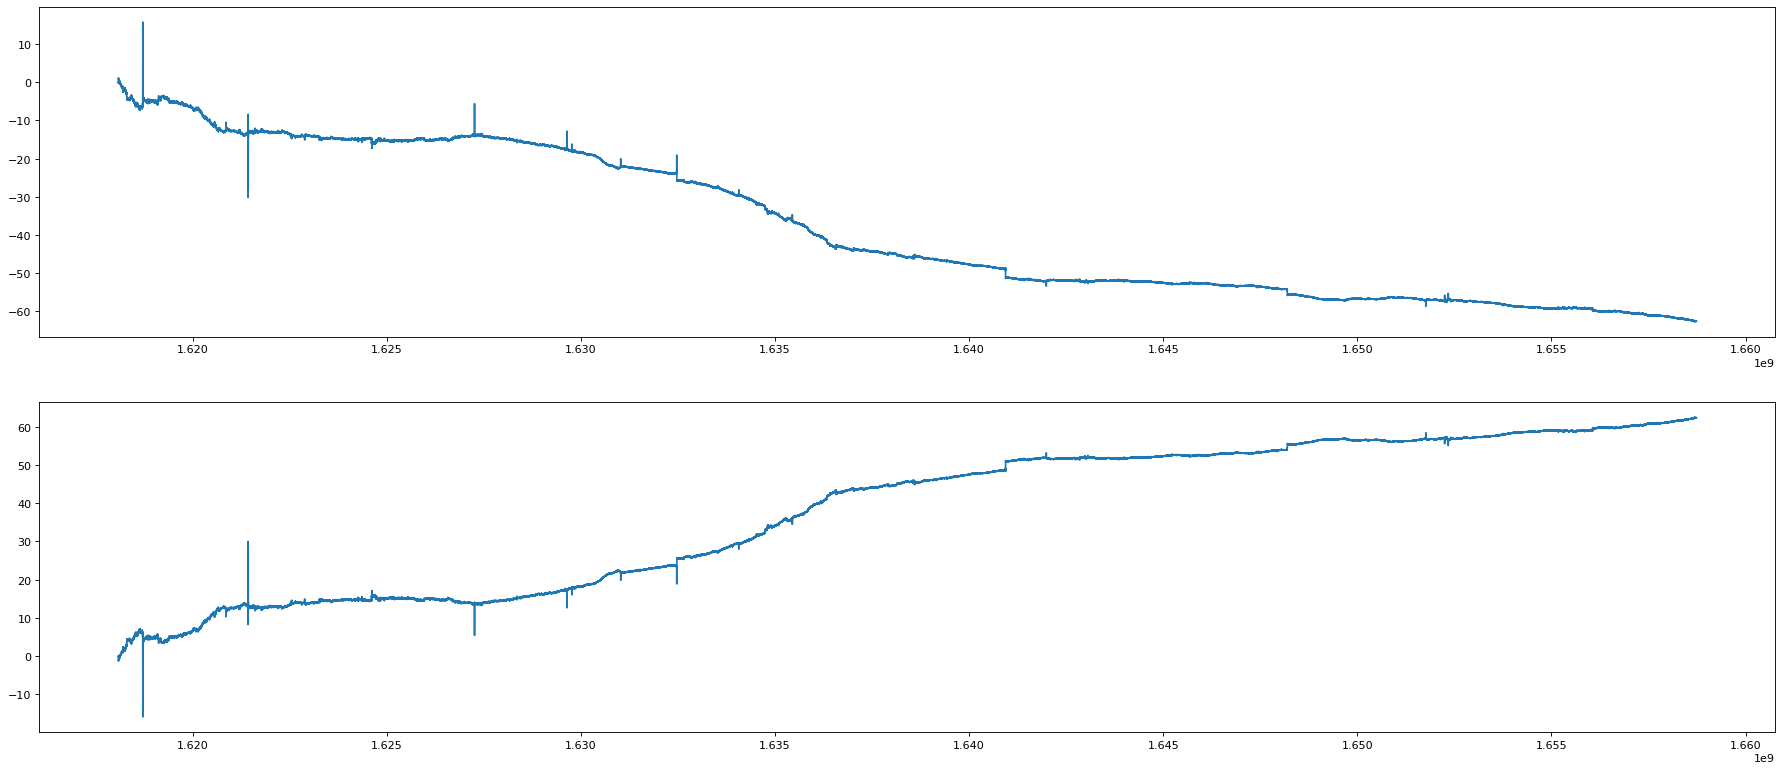

In [24]:
plt.figure(figsize=(28, 12), dpi=80)

ax1 = plt.subplot(2, 1, 1)
ax1.plot(train.index[plot_start:plot_end], rewards)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(train.index[plot_start:plot_end], rewards_swapped)
plt.show()

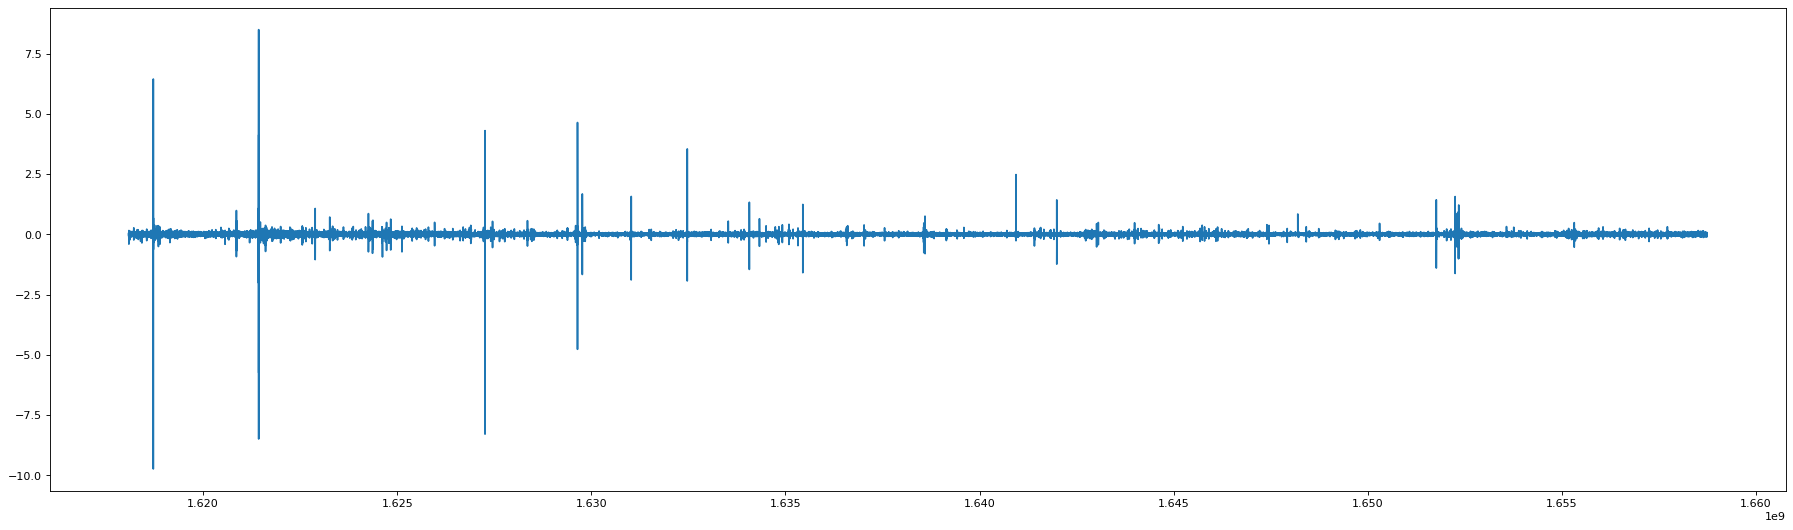

In [32]:
plt.figure(figsize=(28, 8), dpi=80)
rewards_divs = rewards.iloc[:-1].to_numpy() - rewards.iloc[1:].to_numpy()
plt.plot(train.index[plot_start+1:plot_end], rewards_divs)

In [35]:
print(f"Plain rewards characteristics:\n\tmean: {rewards.mean()}, \n\tstd: {rewards.std()}")
print(f"Rewards divisions characteristics:\n\tmean: {rewards_divs.mean()}, \n\tstd: {rewards_divs.std()}")

Plain rewards characteristics:
	mean: -37.79108925765811, 
	std: 19.09879659974893
Rewards divisions characteristics:
	mean: 9.212633656721304e-05, 
	std: 0.05168338467274585


## Test observation

In [38]:
test = pd.read_csv(TEST_FILENAME, dtype={'timestamp': np.int64}, index_col='timestamp')
test.head()

,number_of_trades_p,funding_rate,volume_p,number_of_trades_q,volume_q,time_left,spread,price_change_d_max,price_change_d_min
timestamp,,,,,,,,,
1658732100,163.0,0.000044,14.162,2.0,0.039,5792700.0,0.600157,0.0,-3.023083
1658732160,133.0,0.000044,13.289,0.0,0.000,5792640.0,0.580793,0.0,-3.023083
1658732220,117.0,0.000045,8.574,0.0,0.000,5792580.0,0.638621,0.0,-3.023083
1658732280,725.0,0.000044,112.460,9.0,0.401,5792520.0,0.611762,0.0,-3.023083
1658732340,258.0,0.000044,25.349,0.0,0.000,5792460.0,0.649675,0.0,-3.023083


In [39]:
test.describe()

,number_of_trades_p,funding_rate,volume_p,number_of_trades_q,volume_q,time_left,spread,price_change_d_max,price_change_d_min
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000
mean,573.095063,0.000033,77.161024,5.437513,0.395989,3.392211e+06,0.323561,-0.311171,-4.065316
std,994.296570,0.000055,172.389675,12.744781,1.373332,1.385972e+06,0.328286,0.730736,2.150471
min,1.000000,-0.000143,0.002000,0.000000,0.000000,9.918600e+05,-0.249296,-7.076663,-10.696262
25%,176.000000,-0.000007,15.560750,0.000000,0.000000,2.191845e+06,0.034061,-0.179659,-4.511612
50%,318.000000,0.000034,33.557000,2.000000,0.035000,3.392130e+06,0.144616,0.000000,-3.693667
75%,594.000000,0.000091,75.731250,6.000000,0.268000,4.592535e+06,0.645514,0.000000,-2.620380
max,50469.000000,0.000100,8744.239000,776.000000,144.045000,5.792700e+06,1.058200,0.000000,-1.014628


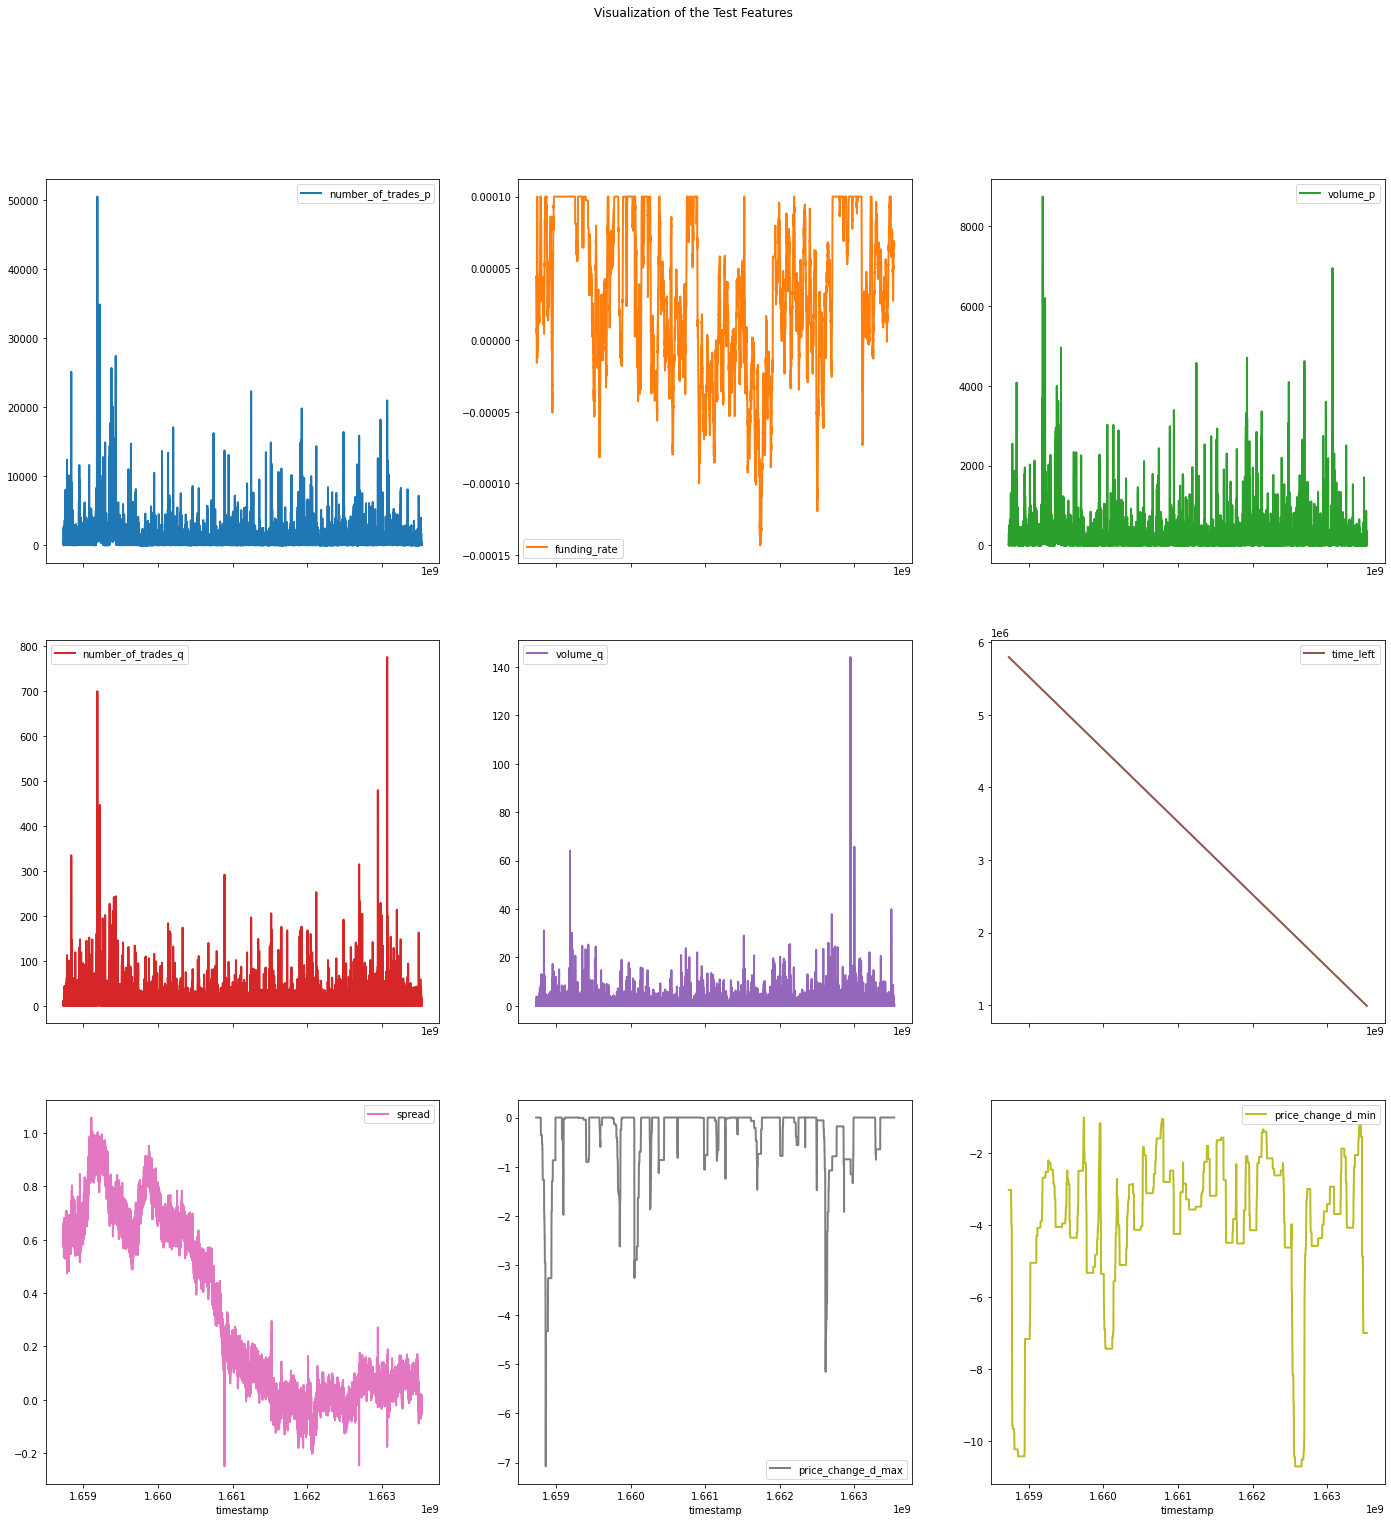

In [43]:
test.plot(subplots=True,
            layout=(3, 3),
            figsize=(24,24),
            fontsize=10, 
            linewidth=2, 
            title='Visualization of the Test Features')
plt.show()

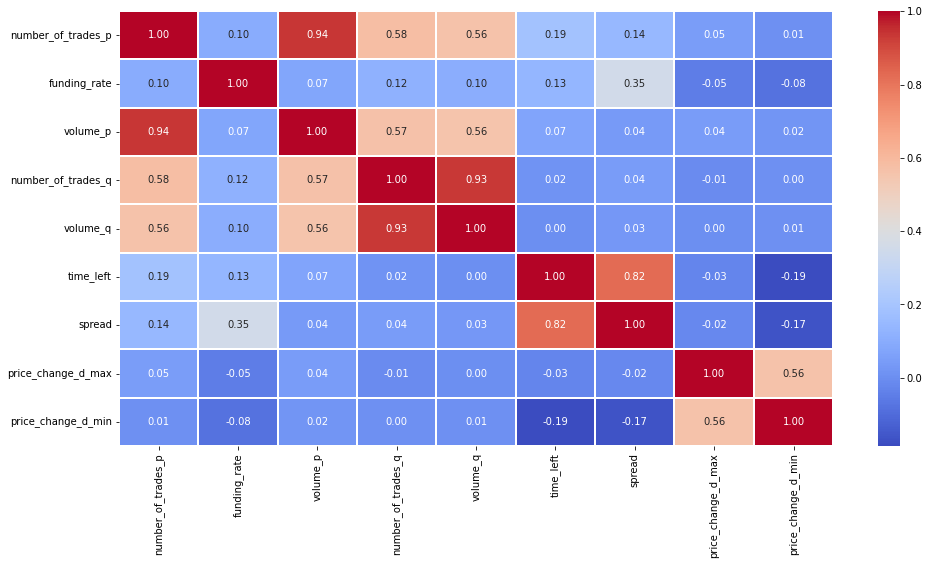

In [44]:
corr_matrix = test.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Plotting reward function for test

In [48]:
plot_start_test = 0
plot_end_test = len(test)
plot_position_type_test = 1

In [50]:
spreads_test = test.iloc[plot_start_test:plot_end_test, SPREAD_ID].to_numpy()
spread_0_test = test.iloc[plot_start_test, SPREAD_ID]
rewards_test = plot_position_type_test * (spread_0_test - spreads_test) - COMMISION_VALUE \
                    - plot_position_type_test * test.iloc[plot_start_test:plot_end_test, FUNDING_RATE_ID].cumsum()
rewards_swapped_test = -plot_position_type_test * (spread_0_test - spreads_test) - COMMISION_VALUE \
                + plot_position_type_test * test.iloc[plot_start_test:plot_end_test, FUNDING_RATE_ID].cumsum()

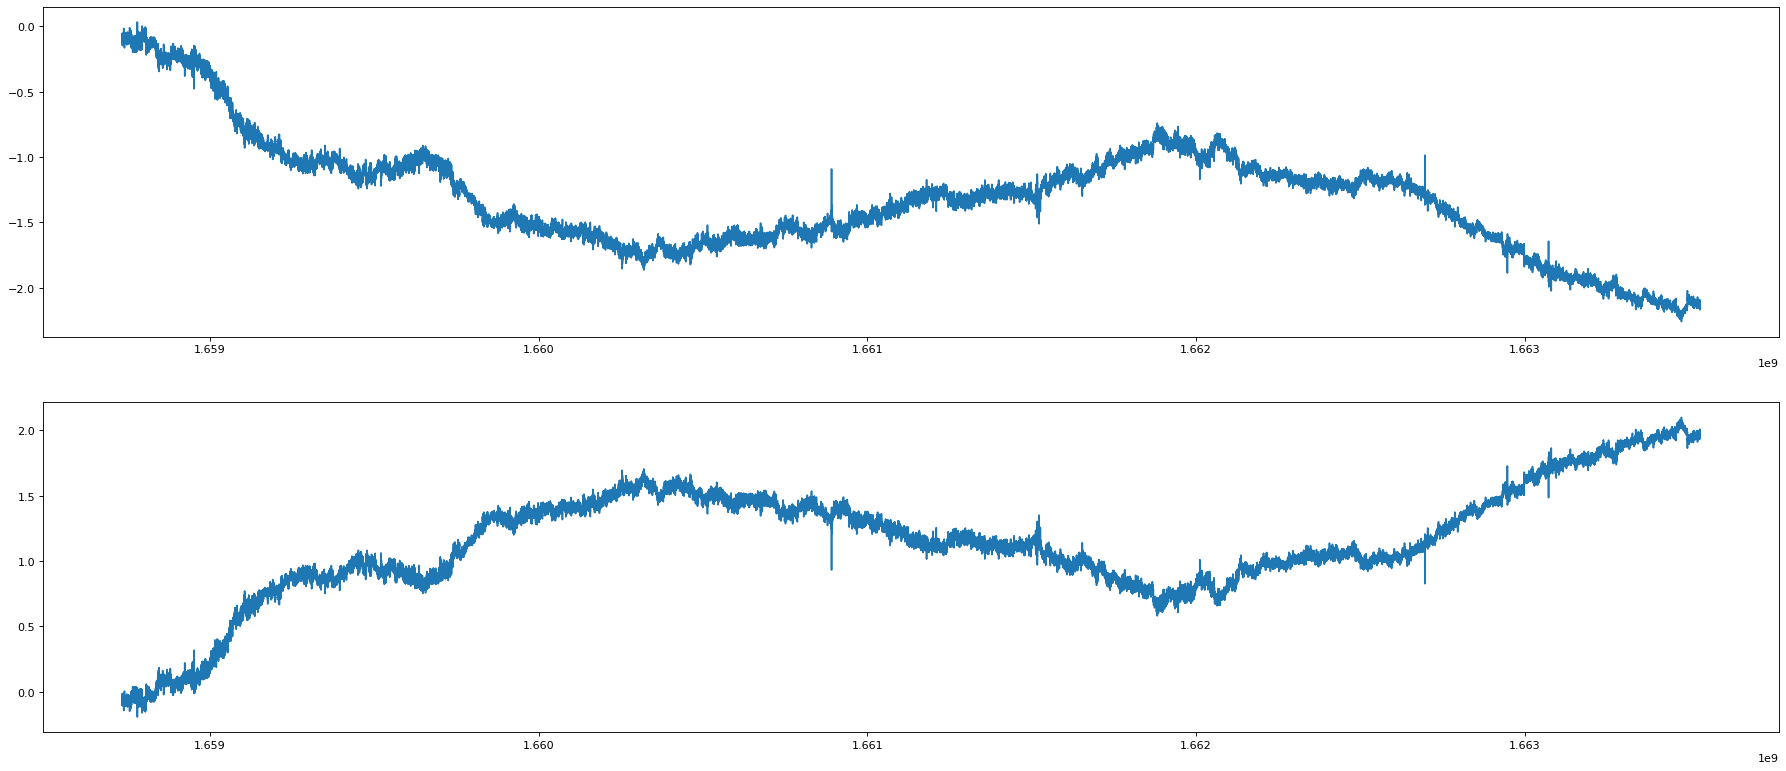

In [51]:
plt.figure(figsize=(28, 12), dpi=80)

ax1 = plt.subplot(2, 1, 1)
ax1.plot(test.index[plot_start_test:plot_end_test], rewards_test)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(test.index[plot_start_test:plot_end_test], rewards_swapped_test)
plt.show()

In [52]:
rewards_divs_test = rewards_test.iloc[:-1].to_numpy() - rewards_test.iloc[1:].to_numpy()

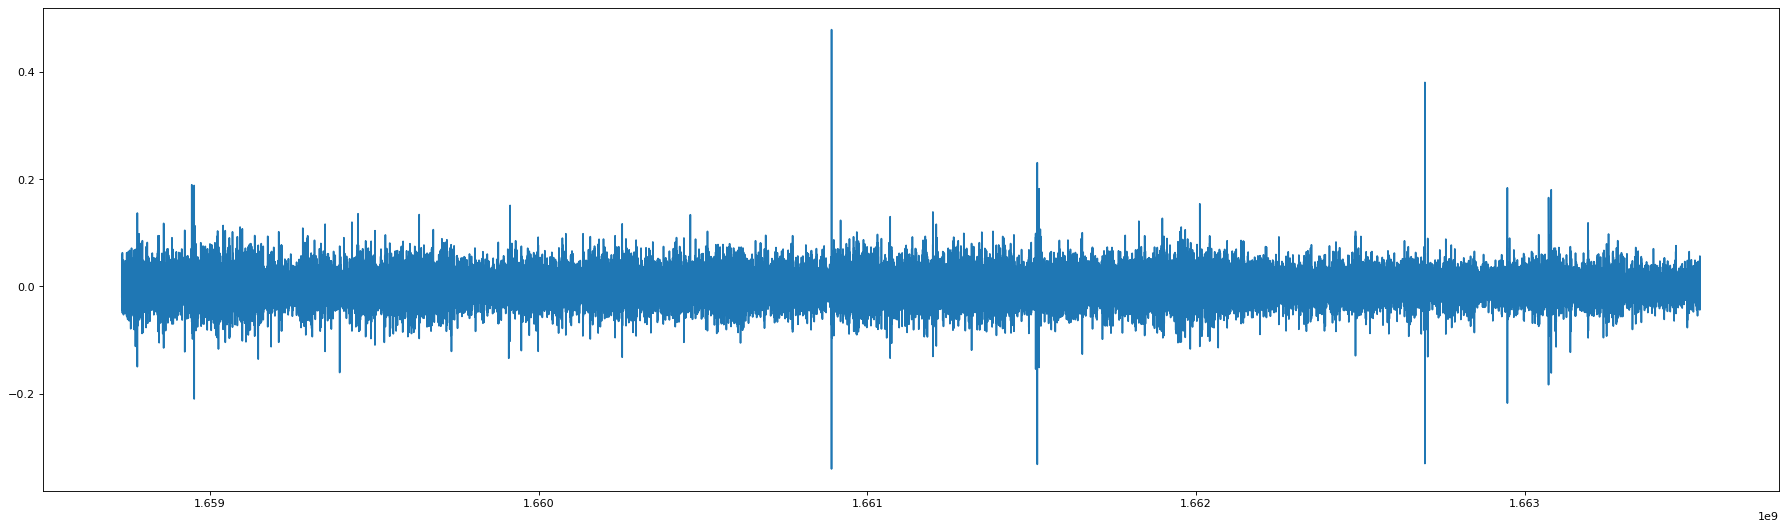

In [53]:
plt.figure(figsize=(28, 8), dpi=80)
plt.plot(test.index[plot_start_test+1:plot_end_test], rewards_divs_test)

In [54]:
print(f"Plain rewards of test dataset characteristics:\n\tmean: {rewards_test.mean()}, \n\tstd: {rewards_test.std()}")
print(f"Rewards divisions of test dataset characteristics:\n\tmean: {rewards_divs_test.mean()}, \n\tstd: {rewards_divs_test.std()}")

Plain rewards of test dataset characteristics:
	mean: -1.305120656987037, 
	std: 0.43469983490686914
Rewards divisions of test dataset characteristics:
	mean: 2.579486650642637e-05, 
	std: 0.02293259834171869
